In [800]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [801]:
RESULT_DIR = "./results/results_paper"

In [802]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getmtime)
    return latest_file

In [803]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file, header=[0])
display(df)

,dataset,optimizer,iteration,variation,runtime
0,Adiac,adam-1000-1,2_1304606831834338190,0.633249,625.493321
1,Adiac,adam-1000-1,0_635570499007058849,0.622548,654.829476
2,Adiac,adam-1000-1,1_370465051410731942,0.647986,654.463301
3,Adiac,adam-1000-1,3_1464982147617559500,0.612679,650.329337
4,Adiac,adam-1000-1,4_169887742225322971,0.645335,661.835801
...,...,...,...,...,...
5275,TwoPatterns,sgld-2000-5,26_747974672226999932,97.738109,230550.657937
5276,TwoPatterns,sgld-2000-5,8_382783979689107275,13.650143,231653.832481
5277,TwoPatterns,sgld-2000-5,13_615429645010231410,14.469101,231734.739500
5278,TwoPatterns,sgld-2000-5,29_429276279113802715,97.706518,223161.512728


In [804]:
df = df[(df.dataset != "TwoPatterns") | (df.optimizer != 'sgld-2000-5')]

In [805]:
filter_func = lambda x: x['iteration'].count() != 30 or x['variation'].count() != 30 or x['runtime'].count() != 30
df.groupby(['dataset', 'optimizer']).filter(filter_func)

,dataset,optimizer,iteration,variation,runtime


In [806]:
unfinshed_datasets = df.groupby(['dataset', 'optimizer']).filter(filter_func)['dataset'].unique()
unfinshed_datasets

array([], dtype=object)

In [807]:
# df[df.dataset == "Adiac"].groupby('optimizer').count()

In [808]:
filter_datasets = list(unfinshed_datasets)#  + ['FaceFour']
filter_datasets

[]

In [809]:
df_filtered = df[~df.dataset.isin(filter_datasets)]

In [810]:
relevant_datasets = ['Beef', 'Coffee', 'FaceFour', 'OliveOil']
# df_filtered = df[df.dataset.isin(relevant_datasets)]

In [811]:
# relevant_optimizers = ["adam-1000-1", "adam-1000-10", "adam-2000-5", "ssg-1000-1", "ssg-1000-10", "ssg-2000-5"]
# relevant_optimizers = ["ssg-1000-1", "ssg-1000-10", "ssg-2000-5"]
# relevant_optimizers = ["adam-1000-1", "adam-1000-10", "adam-2000-5"]
relevant_optimizers = ["adam-1000-1", "adam-1000-10", "adam-2000-5", "ssg-1000-1", "ssg-1000-10", "ssg-2000-5", "sgld-2000-5"]
# relevant_optimizers = ["sgld-1000-1", "sgld-1000-10", "sgld-2000-5"]
df_filtered = df_filtered[df_filtered.optimizer.isin(relevant_optimizers)]

In [812]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                  runtime             
                           mean        std          mean          std
dataset optimizer                                                    
Adiac   adam-1000-1    0.633448   0.017109    714.972988    88.441117
        adam-1000-10   0.880984   0.225950    669.816043    64.668517
        adam-2000-5    0.670154   0.041192   1634.829894    13.608413
        sgld-2000-5   12.328555  10.465139  53248.264768  1380.964433
        ssg-1000-1     0.560179   0.024561    741.406121    64.424078
...                         ...        ...           ...          ...
Yoga    adam-1000-10  69.777681  33.708336   5395.963257   163.869233
        adam-2000-5   76.209044  31.053994  16816.613944   813.598004
        ssg-1000-1    63.630133  19.840079   9771.535562   306.292315
        ssg-1000-10   73.153503  32.621772   9964.573257   293.828635
        ssg-2000-5    70.234226  29.463125  14639.681308  1953.775149

[165 rows x 4 columns]

In [813]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                           mean        std
dataset optimizer                         
Adiac   adam-1000-1    0.633448   0.017109
        adam-1000-10   0.880984   0.225950
        adam-2000-5    0.670154   0.041192
        sgld-2000-5   12.328555  10.465139
        ssg-1000-1     0.560179   0.024561
...                         ...        ...
Yoga    adam-1000-10  69.777681  33.708336
        adam-2000-5   76.209044  31.053994
        ssg-1000-1    63.630133  19.840079
        ssg-1000-10   73.153503  32.621772
        ssg-2000-5    70.234226  29.463125

[165 rows x 2 columns]

In [814]:
df_table = df_variation
# df_table['dataset'] = df_table['dataset'].str.slice(stop=10)

df_table = df_table.groupby(['dataset','optimizer']).agg(['mean', 'std'])
df_table = df_table.stack().unstack(1)

df_table

variation                           \
optimizer                     adam-1000-1 adam-1000-10 adam-2000-5   
dataset                                                              
Adiac                    mean    0.633448     0.880984    0.670154   
                         std     0.017109     0.225950    0.041192   
Beef                     mean   42.703718   102.338255   56.968272   
                         std    13.239729   102.433331   42.447850   
CBF                      mean   22.120741    27.934244   24.513779   
                         std     1.784746     4.336648    3.370049   
ChlorineConcentration    mean   26.080350    55.576133   40.483878   
                         std     3.135738   108.736190   72.717863   
Coffee                   mean    0.693506     0.957467    0.726994   
                         std     0.023482     0.211432    0.071466   
ECG200                   mean    8.964048    12.398793   10.962062   
                         std     2.359379     5.244989    4.360265   
ECG5000                  mean   44.904028    56.844689   46.453065   
                         std    12.034213    17.352274   11.678754   
ElectricDevices          mean   90.158948    96.599530   88.673469   
                         std    15.494233    23.862983   14.705858   
FaceAll                  mean   48.995008    51.287073   53.039112   
                         std    17.868883    18.497325   16.278551   
FaceFour                 mean   48.873069    72.831306   56.562062   
                         std     8.335562    19.671799   13.887557   
FiftyWords               mean   34.245521    54.882221   41.995852   
                         std     6.001835    12.866114    7.077112   
Fish                     mean    1.418186     2.231485    1.428491   
                         std     0.105271     1.363397    0.114020   
GunPoint                 mean    4.905749    15.465042    5.575260   
                         std     2.314549     8.171286    1.247050   
Lightning2               mean  140.309817   171.362594  166.442042   
                         std    45.156136    47.528224   86.052955   
Lightning7               mean   80.124285   109.276487   86.059138   
                         std    22.716577    44.038722   25.227022   
OSULeaf                  mean   50.783188    78.937509   56.869997   
                         std    10.732118    28.859332    9.472608   
OliveOil                 mean    0.031623     0.031171    0.031219   
                         std     0.001625     0.001978    0.001744   
PhalangesOutlinesCorrect mean    3.402319     2.678300    3.013636   
                         std     2.861835     1.206371    1.161854   
SwedishLeaf              mean   12.189071     8.092256    5.852722   
                         std    11.254797     5.109034    1.817699   
SyntheticControl         mean   40.259826    50.833340   40.002454   
                         std     7.773232    11.612781    7.874555   
Trace                    mean  155.116556   217.290361  169.284064   
                         std    19.581187    27.154818   28.982617   
TwoPatterns              mean   42.502172    43.426279   41.547570   
                         std     3.938078     4.384694    3.536145   
Wafer                    mean  111.254055   119.627410  133.394586   
                         std    41.135418    41.068908   43.795359   
Yoga                     mean   79.196030    69.777681   76.209044   
                         std    34.898173    33.708336   31.053994   

                                                                                
optimizer                      sgld-2000-5  ssg-1000-1 ssg-1000-10  ssg-2000-5  
dataset                                                                         
Adiac                    mean    12.328555    0.560179    0.861466    0.641847  
                         std     10.465139    0.024561    0.198611    0.023815  
Beef                     mean    92.779615   16.340137  

In [815]:
print(df_table.to_latex(multirow=True, float_format="{:0.4f}".format))

\begin{tabular}{llrrrrrrr}
\toprule
     & {} & \multicolumn{7}{l}{variation} \\
     & optimizer & adam-1000-1 & adam-1000-10 & adam-2000-5 & sgld-2000-5 & ssg-1000-1 & ssg-1000-10 & ssg-2000-5 \\
dataset & {} &             &              &             &             &            &             &            \\
\midrule
\multirow{2}{*}{Adiac} & mean &      0.6334 &       0.8810 &      0.6702 &     12.3286 &     0.5602 &      0.8615 &     0.6418 \\
     & std &      0.0171 &       0.2260 &      0.0412 &     10.4651 &     0.0246 &      0.1986 &     0.0238 \\
\cline{1-9}
\multirow{2}{*}{Beef} & mean &     42.7037 &     102.3383 &     56.9683 &     92.7796 &    16.3401 &     34.4340 &    22.5390 \\
     & std &     13.2397 &     102.4333 &     42.4478 &     61.4644 &     0.6709 &      5.4278 &     3.3410 \\
\cline{1-9}
\multirow{2}{*}{CBF} & mean &     22.1207 &      27.9342 &     24.5138 &     47.4244 &    18.3451 &     21.7667 &    19.0013 \\
     & std &      1.7847 &       4.3366 &      

In [816]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Adiac,adam-1000-1,"(variation, mean)",0.633448
1,Adiac,adam-1000-10,"(variation, mean)",0.880984
2,Adiac,adam-2000-5,"(variation, mean)",0.670154
3,Adiac,sgld-2000-5,"(variation, mean)",12.328555
4,Adiac,ssg-1000-1,"(variation, mean)",0.560179
...,...,...,...,...
325,Yoga,adam-1000-10,"(variation, std)",33.708336
326,Yoga,adam-2000-5,"(variation, std)",31.053994
327,Yoga,ssg-1000-1,"(variation, std)",19.840079
328,Yoga,ssg-1000-10,"(variation, std)",32.621772


In [817]:
df_dataset_means = df_plot.groupby(['dataset', 'variable']).mean()
df_dataset_means.columns = df_dataset_means.columns.to_flat_index()
df_dataset_means.reset_index(inplace=True)

df_dataset_means['optimizer'] = 'dataset_mean'

In [818]:
# df_plot_relative = pd.concat([df_plot, df_dataset_means], sort=True)
df_plot_relative = df_plot
df_plot_relative['value'] = df_plot_relative.groupby(['dataset', 'variable']).transform(lambda x: x / x.mean())
df_plot_relative

,dataset,optimizer,variable,value
0,Adiac,adam-1000-1,"(variation, mean)",0.267493
1,Adiac,adam-1000-10,"(variation, mean)",0.372023
2,Adiac,adam-2000-5,"(variation, mean)",0.282993
3,Adiac,sgld-2000-5,"(variation, mean)",5.206117
4,Adiac,ssg-1000-1,"(variation, mean)",0.236553
...,...,...,...,...
325,Yoga,adam-1000-10,"(variation, std)",1.113801
326,Yoga,adam-2000-5,"(variation, std)",1.026095
327,Yoga,ssg-1000-1,"(variation, std)",0.655562
328,Yoga,ssg-1000-10,"(variation, std)",1.077898


In [819]:
df_plot_relative_mean = df_plot_relative[df_plot_relative.variable==('variation', 'mean')]
df_plot_relative_mean = df_plot_relative_mean.rename(columns={'value': 'relative variation'})
df_plot_relative_mean = df_plot_relative_mean.drop(columns=['variable'])
df_plot_relative_mean

,dataset,optimizer,relative variation
0,Adiac,adam-1000-1,0.267493
1,Adiac,adam-1000-10,0.372023
2,Adiac,adam-2000-5,0.282993
3,Adiac,sgld-2000-5,5.206117
4,Adiac,ssg-1000-1,0.236553
...,...,...,...
160,Yoga,adam-1000-10,0.968685
161,Yoga,adam-2000-5,1.057968
162,Yoga,ssg-1000-1,0.883342
163,Yoga,ssg-1000-10,1.015549


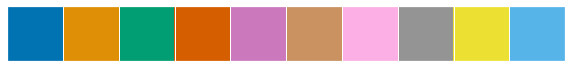

In [820]:
sns.palplot(sns.color_palette("colorblind"))

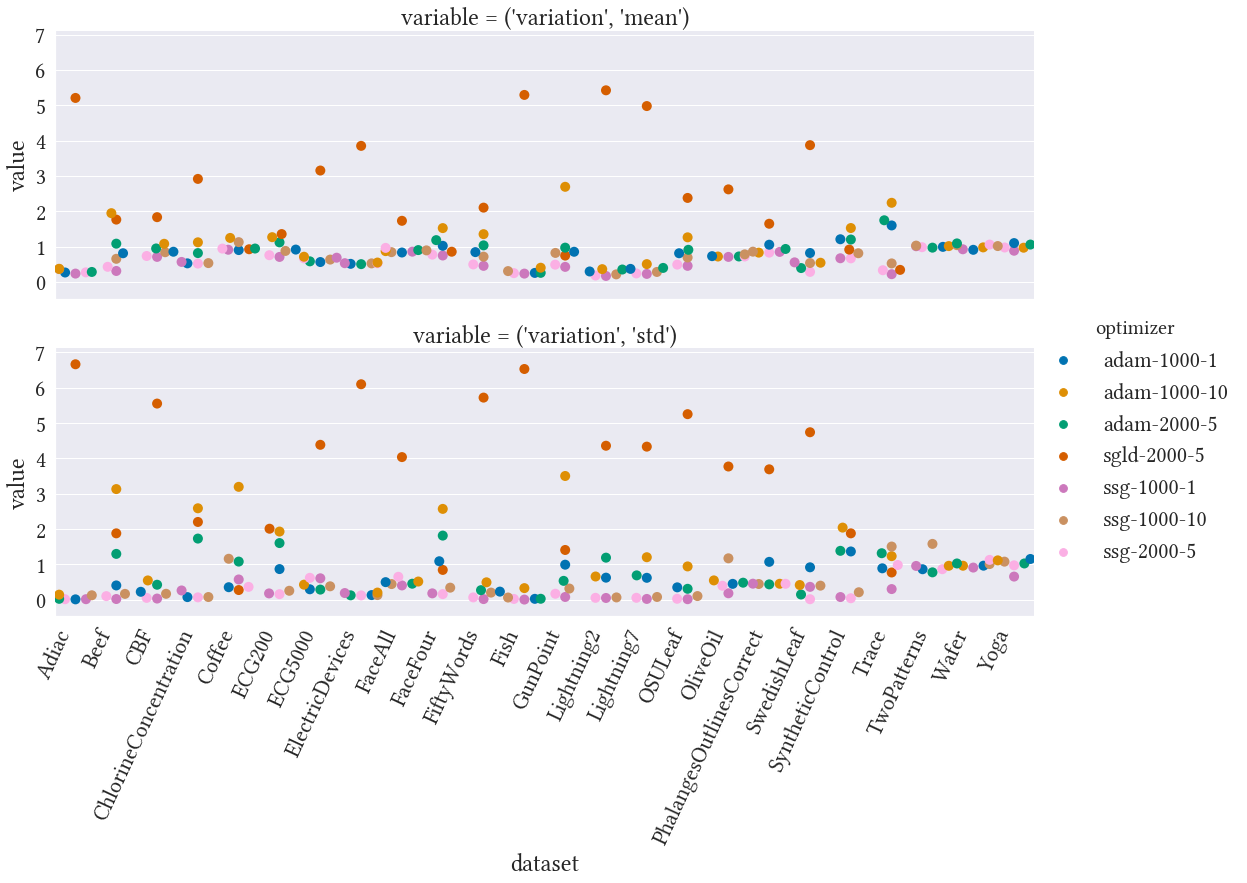

In [821]:
sns.set(font='Linux Libertine')
with sns.plotting_context('notebook', font_scale=2):
    chart = sns.catplot(x='dataset', y='value', hue='optimizer', row='variable', data=df_plot_relative, height=5, aspect=3, s=10, kind='swarm', palette='colorblind')
    plt.xticks(rotation=65, horizontalalignment='right')
plt.savefig('plot.pdf')

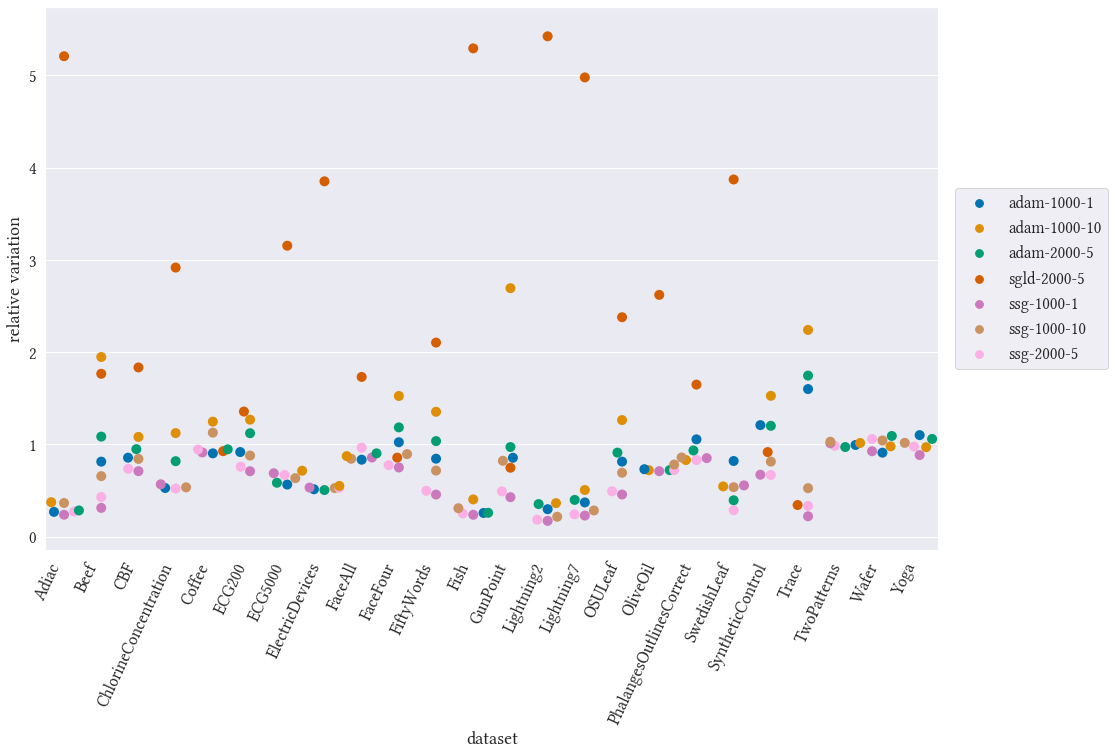

In [822]:
sns.set(font='Linux Libertine', font_scale=1.5)
fig, ax = plt.subplots(figsize=(16,10))
chart = sns.swarmplot(x='dataset', y='relative variation', hue='optimizer', data=df_plot_relative_mean, palette='colorblind', size=10, ax=ax)
chart.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)
plt.xticks(rotation=65, horizontalalignment='right')
plt.savefig('plot_relative_mean.pdf', dpi=300, bbox_inches = "tight")

In [823]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [824]:
df_sign = df.copy()
df_sign['variation_sign'] = np.sign(df.variation)
df_sign.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign        1.0
dataset optimizer        
Adiac   adam-1000-1    30
        adam-1000-10   30
        adam-2000-5    30
        sgld-1000-10   30
        sgld-2000-5    30
...                   ...
Yoga    adam-1000-10   30
        adam-2000-5    30
        ssg-1000-1     30
        ssg-1000-10    30
        ssg-2000-5     30

[175 rows x 1 columns]

In [825]:
df_compare = df_table.reset_index()
df_compare = df_compare[df_compare.level_1 == 'mean']
df_compare.drop(columns=['level_1'], level=0, inplace=True)
# df_compare = df_compare[df_compare.optimizer != 'dataset_mean']

comp = {opt: {opt_c: 0 for opt_c in relevant_optimizers} for opt in relevant_optimizers}
for row in iter(df_compare.iterrows()):
    variats = row[1]['variation']
    for opt in relevant_optimizers:
        for opt_c in relevant_optimizers:
            if variats[opt] < variats[opt_c]:
                comp[opt][opt_c] = comp[opt][opt_c] + 1
    
for opt in relevant_optimizers:
    for opt_c in relevant_optimizers:
        comp[opt][opt_c] = comp[opt][opt_c] / 24 * 100

df_comp_table = pd.DataFrame.from_dict(comp)
df_comp_table

,adam-1000-1,adam-1000-10,adam-2000-5,ssg-1000-1,ssg-1000-10,ssg-2000-5,sgld-2000-5
adam-1000-1,0.000000,16.666667,29.166667,70.833333,58.333333,75.000000,16.666667
adam-1000-10,83.333333,0.000000,79.166667,91.666667,79.166667,83.333333,25.000000
adam-2000-5,70.833333,20.833333,0.000000,83.333333,66.666667,79.166667,20.833333
ssg-1000-1,29.166667,8.333333,16.666667,0.000000,20.833333,29.166667,0.000000
ssg-1000-10,41.666667,20.833333,33.333333,79.166667,0.000000,83.333333,16.666667
ssg-2000-5,25.000000,16.666667,20.833333,70.833333,16.666667,0.000000,4.166667
sgld-2000-5,70.833333,62.500000,66.666667,87.500000,70.833333,83.333333,0.000000


In [826]:
methods = ['ssg', 'adam', 'sgld']
comp_method = {met: 0 for met in methods}
for row in iter(df_compare.iterrows()):
    variats = row[1]['variation']
    best_res = None
    best_opt = None
    for opt in list(variats.keys()):
        if not best_res:
            best_opt = opt 
            best_res = variats[opt]
        if variats[opt] < best_res:
            best_opt = opt
            best_res = variats[opt]
    for met in methods:
        if best_opt.startswith(met):
            comp_method[met] += 1
                        
comp_method

{'ssg': 18, 'adam': 6, 'sgld': 0}

In [827]:
df_compare

dataset   variation                           \
optimizer                           adam-1000-1 adam-1000-10 adam-2000-5   
0                             Adiac    0.633448     0.880984    0.670154   
2                              Beef   42.703718   102.338255   56.968272   
4                               CBF   22.120741    27.934244   24.513779   
6             ChlorineConcentration   26.080350    55.576133   40.483878   
8                            Coffee    0.693506     0.957467    0.726994   
10                           ECG200    8.964048    12.398793   10.962062   
12                          ECG5000   44.904028    56.844689   46.453065   
14                  ElectricDevices   90.158948    96.599530   88.673469   
16                          FaceAll   48.995008    51.287073   53.039112   
18                         FaceFour   48.873069    72.831306   56.562062   
20                       FiftyWords   34.245521    54.882221   41.995852   
22                             Fish    1.418186     2.231485    1.428491   
24                         GunPoint    4.905749    15.465042    5.575260   
26                       Lightning2  140.309817   171.362594  166.442042   
28                       Lightning7   80.124285   109.276487   86.059138   
30                          OSULeaf   50.783188    78.937509   56.869997   
32                         OliveOil    0.031623     0.031171    0.031219   
34         PhalangesOutlinesCorrect    3.402319     2.678300    3.013636   
36                      SwedishLeaf   12.189071     8.092256    5.852722   
38                 SyntheticControl   40.259826    50.833340   40.002454   
40                            Trace  155.116556   217.290361  169.284064   
42                      TwoPatterns   42.502172    43.426279   41.547570   
44                            Wafer  111.254055   119.627410  133.394586   
46                             Yoga   79.196030    69.777681   76.209044   

                                                            
optimizer  sgld-2000-5  ssg-1000-1 ssg-1000-10  ssg-2000-5  
0            12.328555    0.560179    0.861466    0.641847  
2            92.779615   16.340137   34.433972   22.539014  
4            47.424361   18.345070   21.766736   19.001263  
6           144.497266   28.080776   26.436946   25.785320  
8             0.711442    0.700734    0.865833    0.725642  
10           13.258669    6.928917    8.589019    7.408010  
12          251.232534   54.690387   50.441458   53.272302  
14          677.533535   93.417253   92.455237   93.016904  
16          101.747830   50.395758   49.586249   56.683998  
18           40.891917   35.773728   42.708183   36.970980  
20           85.319726   18.481084   29.032622   20.121876  
22           29.341091    1.309530    1.703241    1.383429  
24            4.285097    2.450973    4.718055    2.812623  
26         2564.685135   80.486830  101.519153   86.264381  
28         1078.048488   49.317259   61.312805   52.301970  
30          148.625323   28.495259   43.239343   30.691602  
32            0.113469    0.030715    0.033804    0.031220  
34            5.317632    2.744971    2.767646    2.678300  
36           57.605490    8.250822    7.964399    4.235385  
38           30.515264   22.339245   27.070399   22.257312  
40           33.153568   21.304819   50.886195   32.181268  
42                 NaN   43.284231   44.014850   42.111401  
44                 NaN  113.122887  127.371288  129.331280  
46                 NaN   63.630133   73.153503   70.234226

In [828]:
print(df_comp_table.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  adam-1000-1 &  adam-1000-10 &  adam-2000-5 &  ssg-1000-1 &  ssg-1000-10 &  ssg-2000-5 &  sgld-2000-5 \\
\midrule
adam-1000-1  &         0.00 &         16.67 &        29.17 &       70.83 &        58.33 &       75.00 &        16.67 \\
adam-1000-10 &        83.33 &          0.00 &        79.17 &       91.67 &        79.17 &       83.33 &        25.00 \\
adam-2000-5  &        70.83 &         20.83 &         0.00 &       83.33 &        66.67 &       79.17 &        20.83 \\
ssg-1000-1   &        29.17 &          8.33 &        16.67 &        0.00 &        20.83 &       29.17 &         0.00 \\
ssg-1000-10  &        41.67 &         20.83 &        33.33 &       79.17 &         0.00 &       83.33 &        16.67 \\
ssg-2000-5   &        25.00 &         16.67 &        20.83 &       70.83 &        16.67 &        0.00 &         4.17 \\
sgld-2000-5  &        70.83 &         62.50 &        66.67 &       87.50 &        70.83 &       83.33 &         0.00 \\
\botto